In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

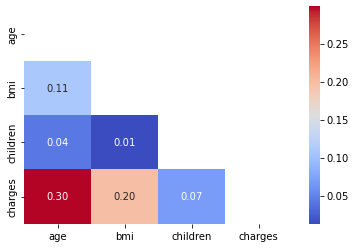

In [8]:
# calculate correlation matrix
corr_matrix = df.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', mask=mask)

# display the plot
plt.show()

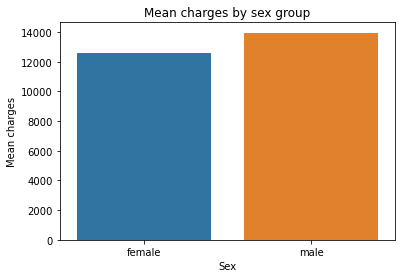

In [9]:
# create a bar chart of mean charges by sex group
sns.barplot(x='sex', y='charges', data=df, ci=None)

# set axis labels and plot title
plt.xlabel('Sex')
plt.ylabel('Mean charges')
plt.title('Mean charges by sex group')

# display the plot
plt.show()

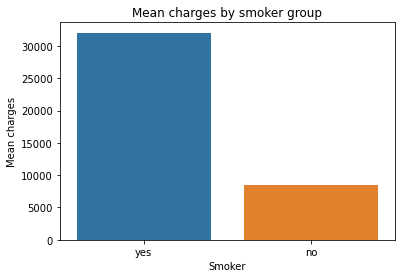

In [10]:
# create a bar chart of mean charges by sex group
sns.barplot(x='smoker', y='charges', data=df, ci=None)

# set axis labels and plot title
plt.xlabel('Smoker')
plt.ylabel('Mean charges')
plt.title('Mean charges by smoker group')

# display the plot
plt.show()

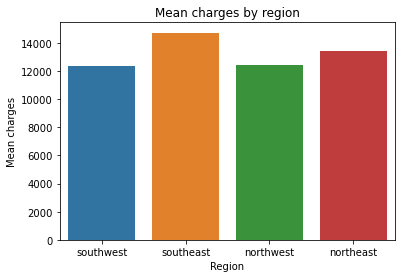

In [11]:
# create a bar chart of mean charges by sex group
sns.barplot(x='region', y='charges', data=df, ci=None)

# set axis labels and plot title
plt.xlabel('Region')
plt.ylabel('Mean charges')
plt.title('Mean charges by region')

# display the plot
plt.show()

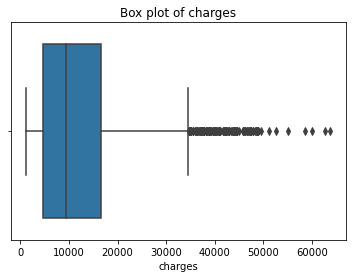

In [12]:
# create a box plot of the numeric column
sns.boxplot(x='charges', data=df)

# set axis labels and plot title
plt.xlabel('charges')
plt.title('Box plot of charges')

# display the plot
plt.show()

# Gestion outliers

In [13]:
df_numericas = df.select_dtypes(include=np.number)

In [15]:
df_numericas.head(1)

,age,bmi,children,charges
0,19,27.9,0,16884.924


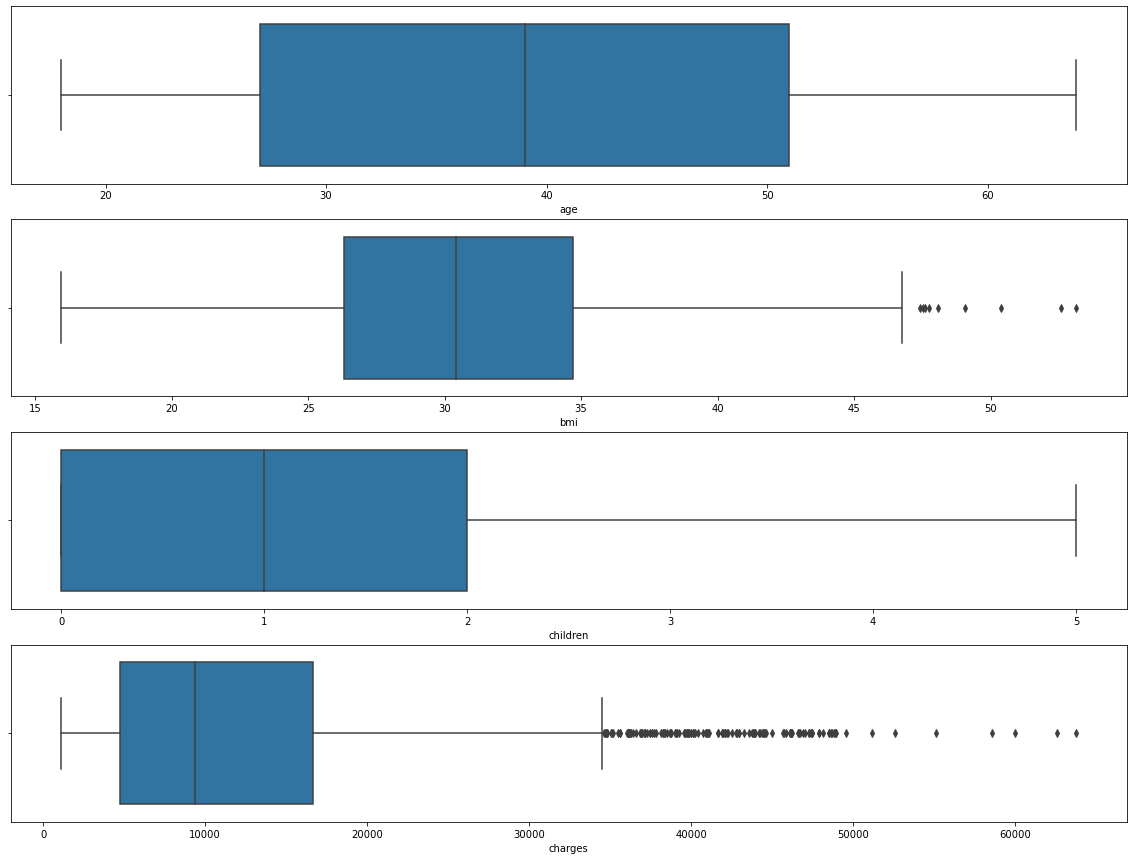

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [17]:
# cálculo del Q1
Q1 = np.nanpercentile(df['charges'], 25)
Q1

4740.28715

In [18]:
# cálculo del Q3
Q3 = np.nanpercentile(df['charges'], 75)
Q3

16639.912515

In [19]:
# calculemos el IQR 

IQR = Q3 - Q1
IQR

11899.625365

In [20]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

17849.4380475

In [21]:
outliers_data = df[(df["charges"] < Q1 - outlier_step) | (df["charges"] > Q3 + outlier_step)]

In [34]:
outliers_data.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [23]:
outliers_data.value_counts("smoker")

smoker
yes    136
no       3
dtype: int64

# Podemos observar que de 139 outliers, 136 son fumadores. Separaremos los fumadores de los no fumadores

In [49]:
df_no_fumadores = df.loc[df['smoker'] == 'no']

In [64]:
df_no_fumadores.shape

(1064, 7)

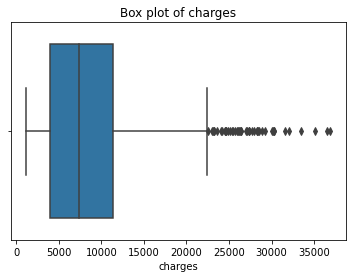

In [50]:
# create a box plot of the numeric column
sns.boxplot(x='charges', data=df_no_fumadores)

# set axis labels and plot title
plt.xlabel('charges')
plt.title('Box plot of charges')

# display the plot
plt.show()

In [51]:
# cálculo del Q1
Q1_no_fumadores = np.nanpercentile(df_no_fumadores['charges'], 25)
Q1_no_fumadores

3986.4386999999997

In [52]:
# cálculo del Q3
Q3_no_fumadores = np.nanpercentile(df_no_fumadores['charges'], 75)
Q3_no_fumadores

11362.88705

In [53]:
# calculemos el IQR 
IQR_no_fumadores = Q3_no_fumadores - Q1_no_fumadores
IQR_no_fumadores

7376.44835

In [54]:
# multiplicamos el IQR por 1.5

outlier_step_no_fumadores = 1.5 * IQR_no_fumadores
outlier_step_no_fumadores

11064.672525

In [55]:
outliers_data_no_fumadores = df_no_fumadores[(df_no_fumadores["charges"] < Q1_no_fumadores - outlier_step_no_fumadores) | (df_no_fumadores["charges"] > Q3_no_fumadores + outlier_step_no_fumadores)]

In [63]:
outliers_data_no_fumadores.head(10)

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
62,64,male,24.700,1,no,northwest,30166.61817
115,60,male,28.595,0,no,northeast,30259.99556
138,54,female,31.900,3,no,southeast,27322.73386
140,34,male,22.420,2,no,northeast,27375.90478
219,24,female,23.210,0,no,southeast,25081.76784
227,58,female,41.910,0,no,southeast,24227.33724
242,55,female,26.800,1,no,southwest,35160.13457
245,54,male,30.020,0,no,northwest,24476.47851
289,52,male,26.400,3,no,southeast,25992.82104


In [58]:
outliers_data_no_fumadores.shape

(46, 7)

In [67]:
outliers_data_no_fumadores.value_counts("sex")

sex
female    25
male      21
dtype: int64

In [68]:
outliers_data_no_fumadores.value_counts("region")

region
northeast    14
northwest    13
southeast    12
southwest     7
dtype: int64

In [69]:
outliers_data_no_fumadores.value_counts("children")

children
1    14
2    14
0    12
3     4
4     2
dtype: int64

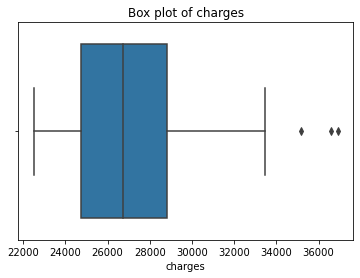

In [70]:
# create a box plot of the numeric column
sns.boxplot(x='charges', data=outliers_data_no_fumadores)

# set axis labels and plot title
plt.xlabel('charges')
plt.title('Box plot of charges')

# display the plot
plt.show()

In [31]:
df_fumadores = df.loc[df['smoker'] == 'yes']

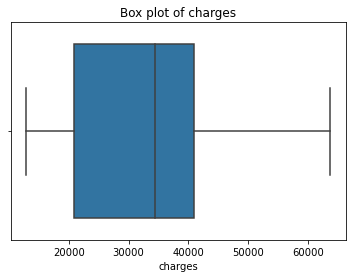

In [32]:
# create a box plot of the numeric column
sns.boxplot(x='charges', data=df_fumadores)

# set axis labels and plot title
plt.xlabel('charges')
plt.title('Box plot of charges')

# display the plot
plt.show()